In [3]:
!pip install pymoo


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Importing the Required Packages**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.termination import get_termination
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.decomposition.asf import ASF
from pymoo.mcdm.pseudo_weights import PseudoWeights

**Developing a Class**

In [5]:
class Exercise(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=3,
                         n_ieq_constr=2,
                         xl=np.array([0,0]),
                         xu=np.array([4,8]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = (-x[0] - 3*x[1])
        f2 = 3*x[0] - x[1]
        f3 = -x[0] + x[1]

        g1 = 2*x[0] + x[1] - 8
        g2 = x[0] + 2*x[1] - 10

        out["F"] = [f1, f2, f3]
        out["G"] = [g1, g2]


problem = Exercise()

**Initializing an Algorithm**

In [6]:
algorithm = NSGA2(
    pop_size=100,
    n_offsprings=40,
    sampling=FloatRandomSampling(),
    crossover=SBX(prob=0.95, eta=20),
    mutation=PM(eta=20),
    eliminate_duplicates=True
)

termination = get_termination("n_eval", 1000)


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.config import Config
Config.warnings['not_compiled'] = False



**Finding the Optimal set**

In [9]:
results = minimize(problem,algorithm,termination,seed=7,
               save_history=True,
               verbose=True)

n_gen  |  n_eval  | n_nds  |     cv_min    |     cv_avg    |      eps      |   indicator  
     1 |      100 |     46 |  0.000000E+00 |  3.0146615920 |             - |             -
     2 |      140 |     75 |  0.000000E+00 |  0.3193650199 |  0.0253206414 |         ideal
     3 |      180 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0055561413 |         ideal
     4 |      220 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0123587270 |         ideal
     5 |      260 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0394002456 |         ideal
     6 |      300 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0089278149 |         ideal
     7 |      340 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0134601417 |         ideal
     8 |      380 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0135934767 |         ideal
     9 |      420 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0026930472 |         nadir
    10 |      460 |    100 |  0.000000E+00 |  0.000000E+00 |  0.0032834983 |         ideal

**Results and Visualization**

In [10]:
X = results.X
F = results.F

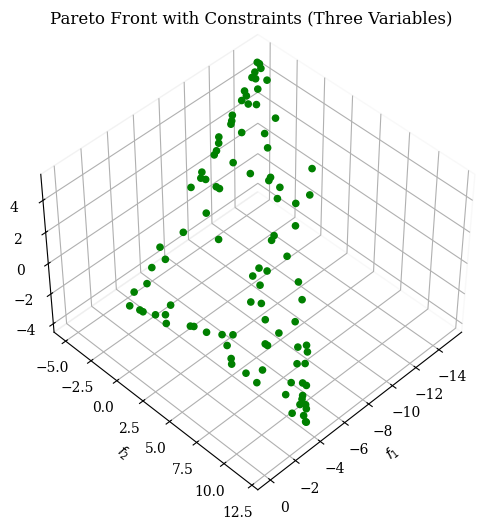

In [11]:
plot = Scatter(title="Pareto Front with Constraints (Three Variables)")
plot.add(F, color="green")
plot.show()

**Normalization**

In [12]:
ideal_point = F.min(axis=0)
nadir_point = F.max(axis=0)
nF = (F - ideal_point) / (nadir_point - ideal_point)

**Compromise Programming**

In [17]:
weights = np.array([0.6, 0.2,0.2])
decomp = ASF()
Opt_Index = decomp.do(nF, 1/weights).argmin()
print(f"Best ASF: \n Opt_index = {Opt_Index} \n F = {F[Opt_Index]}")

Best ASF: 
 Opt_index = 15 
 F = [-12.37740428   2.73548511   1.38128681]


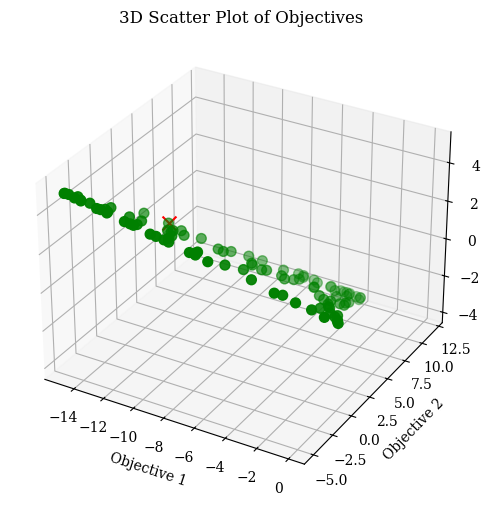

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(F[:, 0], F[:, 1], F[:, 2], s=50, c='green', marker='o')
ax.scatter(F[Opt_Index, 0], F[Opt_Index, 1], F[Opt_Index, 2], c='red', marker='x', s=100)
ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 2')
ax.set_zlabel('Objective 3')
ax.set_title('3D Scatter Plot of Objectives')
plt.show()

**Pseudo-Weight Method**

In [15]:
weights = np.array([0.6, 0.2,0.2])
Opt_Index = PseudoWeights(weights).do(nF)

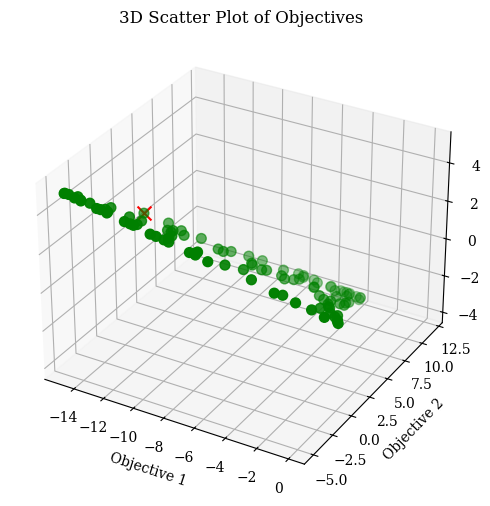

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(F[:, 0], F[:, 1], F[:, 2], s=50, c='green', marker='o')
ax.scatter(F[Opt_Index, 0], F[Opt_Index, 1], F[Opt_Index, 2], c='red', marker='x', s=100)
ax.set_xlabel('Objective 1')
ax.set_ylabel('Objective 2')
ax.set_zlabel('Objective 3')
ax.set_title('3D Scatter Plot of Objectives')
plt.show()